In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from tpot import TPOTClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost

from sklearn.metrics import roc_auc_score
import scikitplot as skplt
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
#valores estaticos
TEST_SIZE=0.20
RANDOM_STATE=42

In [3]:
df = pd.read_csv("../../data/processed/4.4/train/m1.0 - mes actual dumies - 6m.N.polizaXmes y Info.Cliente.M.Pago.csv", index_col="Unnamed: 0")
df.info()

/home/seba/anaconda3/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1268770 entries, 1690 to 21096072
Data columns (total 37 columns):
6m                               1268770 non-null int64
5m                               1268770 non-null int64
4m                               1268770 non-null int64
3m                               1268770 non-null int64
2m                               1268770 non-null int64
1m                               1268770 non-null int64
6m_rel                           1268770 non-null int64
5m_rel                           1268770 non-null int64
4m_rel                           1268770 non-null int64
3m_rel                           1268770 non-null int64
2m_rel                           1268770 non-null int64
1m_rel                           1268770 non-null int64
edad_r                           1268770 non-null int64
Churn                            1268770 non-null int64
GENDER_F                         1268770 non-null int64
GENDER_M                         1268770 no

In [4]:
#distrib de churn
np.sum(df["Churn"]) / len(df) * 100

1.7311254206830238

# Muestra random

In [5]:
msk = np.random.rand(len(df)) < 0.6

In [6]:
RANDOM_STATE=42
size = 0.6
"""
from sklearn.model_selection import StratifiedShuffleSplit


sss = StratifiedShuffleSplit(n_splits=1, test_size=size, random_state=RANDOM_STATE)
for train_index, val_index in sss.split(X,y):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]

"""

'\nfrom sklearn.model_selection import StratifiedShuffleSplit\n\n\nsss = StratifiedShuffleSplit(n_splits=1, test_size=size, random_state=RANDOM_STATE)\nfor train_index, val_index in sss.split(X,y):\n    X_train, X_val = X[train_index], X[val_index]\n    y_train, y_val = y[train_index], y[val_index]\n\n'

In [7]:
df[~msk]

,6m,5m,4m,3m,2m,1m,6m_rel,5m_rel,4m_rel,3m_rel,...,EDUCATION_LEVEL_SECUNDARIO,EDUCATION_LEVEL_TERCIARIO,EDUCATION_LEVEL_UNIVERSITARIO,ModoPago_BA,ModoPago_CC,ModoPago_Mix,ModoPago_PP,ModoPago_SJ,ModoPago_TA,ModoPago_TM
1690,1,1,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1690,1,1,1,1,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1690,1,1,1,1,1,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1690,1,1,1,1,1,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1690,1,1,1,1,1,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
5575,2,2,2,2,2,2,0,2,0,1,...,0,0,0,0,0,1,0,0,0,0
5575,0,2,2,2,2,2,0,5,7,0,...,0,0,0,0,0,1,0,0,0,0
5575,0,0,2,2,2,2,0,0,5,7,...,0,0,0,0,0,1,0,0,0,0
5575,1,0,0,0,0,0,1,13,1,0,...,0,0,0,0,0,1,0,0,0,0
5575,1,1,1,1,0,0,5,2,4,1,...,0,0,0,0,0,1,0,0,0,0


In [8]:
df = df[msk]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 761713 entries, 1690 to 21096072
Data columns (total 37 columns):
6m                               761713 non-null int64
5m                               761713 non-null int64
4m                               761713 non-null int64
3m                               761713 non-null int64
2m                               761713 non-null int64
1m                               761713 non-null int64
6m_rel                           761713 non-null int64
5m_rel                           761713 non-null int64
4m_rel                           761713 non-null int64
3m_rel                           761713 non-null int64
2m_rel                           761713 non-null int64
1m_rel                           761713 non-null int64
edad_r                           761713 non-null int64
Churn                            761713 non-null int64
GENDER_F                         761713 non-null int64
GENDER_M                         761713 non-null int64
MARI

In [9]:
#distrib de churn
np.sum(df["Churn"]) / len(df)

0.017184950237162815

# split data set

In [10]:
X = df.drop(columns=["Churn"], axis=1)
y = df["Churn"]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE)

In [12]:
print("train: {} - test: {}".format(len(X_train), len(X_test)))

train: 609370 - test: 152343


In [13]:
#distrib de churn
np.sum(y_train) / len(y_train)

0.017194807752268736

In [14]:
X_train.head()

,6m,5m,4m,3m,2m,1m,6m_rel,5m_rel,4m_rel,3m_rel,...,EDUCATION_LEVEL_SECUNDARIO,EDUCATION_LEVEL_TERCIARIO,EDUCATION_LEVEL_UNIVERSITARIO,ModoPago_BA,ModoPago_CC,ModoPago_Mix,ModoPago_PP,ModoPago_SJ,ModoPago_TA,ModoPago_TM
19327628,1,1,1,1,1,1,3,3,1,1,...,0,0,0,0,0,0,0,0,0,1
9862707,1,1,1,1,1,1,1,4,2,2,...,0,0,0,0,0,1,0,0,0,0
1566226,2,2,2,2,2,2,3,16,2,2,...,0,0,0,0,0,1,0,0,0,0
19895118,1,1,1,1,1,1,4,1,3,1,...,0,0,0,0,0,0,0,0,0,1
2769129,1,1,1,1,1,1,3,4,2,8,...,0,0,0,1,0,0,0,0,0,0


# Modelo 1: ExtraTreesClassifier

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.externals import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score


from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.externals import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from tpot import TPOTClassifier
from sklearn.neighbors import KNeighborsClassifier



from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score

In [16]:
#meta parameters
#param_range = [2, 6, 10, 15, 22]
param_range_leaf = [8,10,12]
param_range = [20 , 22 ,24]
#param_range_fl = [1.0]
class_weight_range = [{0:1, 1:85}, {0:1, 1:90}, {0:1, 1:95}]
n_estimators = [10, 20, 50]

In [17]:
#parameters
grid_params_et = [{'clf__criterion': ['gini'], #, 'entropy'
                'clf__min_samples_leaf': param_range_leaf,
                'clf__min_samples_split': param_range,
                "clf__n_estimators" : n_estimators,
                'clf__class_weight' : class_weight_range}]


#pipelines
pipe_et = Pipeline([('scl', StandardScaler()),
                    ('clf', ExtraTreesClassifier(random_state=RANDOM_STATE))])

#########################################
#### config
# Construct grid searches
jobs = -1
#scoring = "roc_auc"
#scoring = "roc_auc" #http://scikit-learn.org/stable/auto_examples/model_selection/plot_multi_metric_evaluation.html
scoring = {'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score)}
cv = 5


gs_et = GridSearchCV(estimator=pipe_et,
            param_grid=grid_params_et,
            scoring=scoring,
            cv=cv,
            verbose=1,
            refit="AUC",
            n_jobs=jobs)

#pipelines scoring
gs_et.fit(X_train, y_train)
y_pred_gs_et = gs_et.predict(X_test)
print("#"*35)
print(gs_et.best_estimator_)
print('Test set roc auc score for best params: %.3f ' % roc_auc_score(y_test, y_pred_gs_et))
skplt.metrics.plot_confusion_matrix(y_test, y_pred_gs_et, normalize=True)
plt.show()

Fitting 5 folds for each of 81 candidates, totalling 405 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 14.1min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 64.6min


KeyboardInterrupt: 

In [ ]:
print(gs_et.best_params_)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  2.9min finished


###################################
Pipeline(memory=None,
     steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', RandomForestClassifier(bootstrap=True, class_weight={0: 1, 1: 90},
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity...stimators=10, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False))])
Test set roc auc score for best params: 0.654 


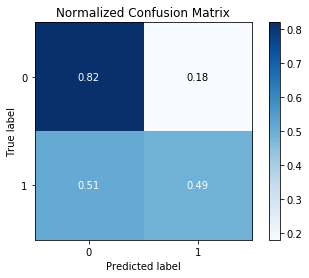

In [20]:
#parameters
grid_params_rf = [{'clf__criterion': ['gini'], #, 'entropy'
                'clf__min_samples_leaf': param_range_leaf,
                'clf__min_samples_split': param_range,
                "clf__n_estimators" : n_estimators,
                'clf__class_weight' : class_weight_range}]


#pipelines
pipe_rf = Pipeline([('scl', StandardScaler()),
                    ('clf', RandomForestClassifier(random_state=RANDOM_STATE))])

#########################################
#### config
# Construct grid searches
jobs = -1
#scoring = "roc_auc"
#scoring = "roc_auc" #http://scikit-learn.org/stable/auto_examples/model_selection/plot_multi_metric_evaluation.html
scoring = {'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score)}
cv = 5


gs_rf = GridSearchCV(estimator=pipe_rf,
            param_grid=grid_params_rf,
            scoring=scoring,
            cv=cv,
            verbose=1,
            refit="AUC",
            n_jobs=jobs)

#pipelines scoring
gs_rf.fit(X_train, y_train)
y_pred_gs_rf = gs_rf.predict(X_test)
print("#"*35)
print(gs_rf.best_estimator_)
print('Test set roc auc score for best params: %.3f ' % roc_auc_score(y_test, y_pred_gs_rf))
skplt.metrics.plot_confusion_matrix(y_test, y_pred_gs_rf, normalize=True)
plt.show()

In [31]:
clf = gs_et

In [32]:
print(clf.score(X_test, y_test))
yp = clf.predict_proba(X_test)
roc_auc_score(y_test, yp[:,1])

0.7255414783341637


0.7255414783341637

In [33]:
res = pd.DataFrame()
res["y"] = y_test
res["yp"] = yp[:,1]

In [34]:
res["dif"] = res["y"] - res["yp"]
res["dif"] = res["dif"].apply(abs)
res.sort_values(by="dif", ascending=False, inplace=True)

In [63]:
res[(res.y == 1) & (res.dif > 0.7)]

,y,yp,dif
1496530,1,0.000000,1.000000
12380292,1,0.023747,0.976253
2303184,1,0.038742,0.961258
1443851,1,0.091611,0.908389
10786842,1,0.094816,0.905184
10892233,1,0.100206,0.899794
11359192,1,0.115387,0.884613
7790851,1,0.117004,0.882996
8564960,1,0.118497,0.881503
18826729,1,0.121326,0.878674


Test set roc auc score for best params: 0.632 


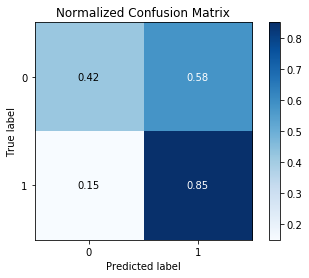

In [36]:
y_pred = clf.predict(X_test)

print('Test set roc auc score for best params: %.3f ' % roc_auc_score(y_test, y_pred))

skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)

In [54]:
#evaluación contra el testeo externo
df_testo_ext = pd.read_csv("../../data/processed/4.4/test_cliente/m1.0 - mes actual dummies - churn estricto - 6m.N.polizaXmes y Info.Cliente.M.Pago.csv", index_col="Unnamed: 0")
df_testo_ext.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32389 entries, 5575 to 21096026
Data columns (total 36 columns):
6m                               32389 non-null int64
5m                               32389 non-null int64
4m                               32389 non-null int64
3m                               32389 non-null int64
2m                               32389 non-null int64
1m                               32389 non-null int64
edad_r                           32389 non-null int64
6m_rel                           32389 non-null int64
5m_rel                           32389 non-null int64
4m_rel                           32389 non-null int64
3m_rel                           32389 non-null int64
2m_rel                           32389 non-null int64
1m_rel                           32389 non-null int64
GENDER_F                         32389 non-null int64
GENDER_M                         32389 non-null int64
MARITAL_STATUS_Casado            32389 non-null int64
MARITAL_STATUS_Conviv

In [55]:
X_testo_ext = df_testo_ext.drop("Churn", axis=1)
y_testeo_ext = df_testo_ext["Churn"]

KeyError: "labels ['Churn'] not contained in axis"

In [39]:
y_pred_testeo_ext = clf.predict(X_testo_ext)
roc_auc_score(y_testeo_ext, y_pred_testeo_ext)

0.6643729607163102

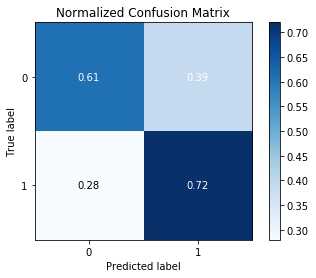

In [40]:
skplt.metrics.plot_confusion_matrix(y_testeo_ext, y_pred_testeo_ext, normalize=True)

In [44]:
#bajando el modelo
from sklearn.externals import joblib

joblib.dump(clf.best_estimator_, '../../models/4.4/M2.1 - Modelo StandardScaler-ExtraTreesClassifier (0.63-0.66) - Churn estricto- 6m.N.polizaXmes y Info.Cliente.M.Pago.pkl')

['../../models/4.4/M2.1 - Modelo StandardScaler-ExtraTreesClassifier (0.63-0.66) - Churn estricto- 6m.N.polizaXmes y Info.Cliente.M.Pago.pkl']

In [43]:
clf.best_estimator_

Pipeline(memory=None,
     steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', ExtraTreesClassifier(bootstrap=False, class_weight={0: 1, 1: 90},
           criterion='gini', max_depth=None, max_features='auto',
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_spl...estimators=10, n_jobs=1, oob_score=False, random_state=42,
           verbose=0, warm_start=False))])

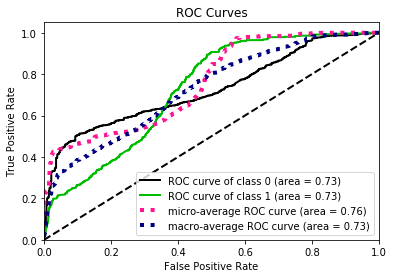

In [61]:
# visualizacion 
import scikitplot as skplt

ypp = clf.predict_proba(X_testo_ext)

skplt.metrics.plot_roc(y_testeo_ext, ypp)

# Realizando predicción para entregar

In [56]:
df_pred = pd.read_csv("../../data/processed/4.4/prediccion_para_cliente/m1.0 - mes actual dummies - pred 3 meses exacto - 6m.N.polizaXmes, Info.Cliente, interacción y cancelacion.M.Pago.csv", index_col="Unnamed: 0")
df_pred.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32389 entries, 5575 to 21096026
Data columns (total 36 columns):
6m                               32389 non-null int64
5m                               32389 non-null int64
4m                               32389 non-null int64
3m                               32389 non-null int64
2m                               32389 non-null int64
1m                               32389 non-null int64
edad_r                           32389 non-null int64
6m_rel                           32389 non-null int64
5m_rel                           32389 non-null int64
4m_rel                           32389 non-null int64
3m_rel                           32389 non-null int64
2m_rel                           32389 non-null int64
1m_rel                           32389 non-null int64
GENDER_F                         32389 non-null int64
GENDER_M                         32389 non-null int64
MARITAL_STATUS_Casado            32389 non-null int64
MARITAL_STATUS_Conviv

In [57]:
y_pred_predFin  = clf.best_estimator_.predict_proba(df_pred)

In [58]:
csv = pd.DataFrame()
csv["CUSTOMER_ID"] = df_pred.index.values
csv["PRED"] = pd.DataFrame(y_pred_predFin)[1]
csv.set_index("CUSTOMER_ID", inplace=True)
csv.head()

,PRED
CUSTOMER_ID,
5575,0.497168
7968,0.320680
9028,0.247097
9860,0.113024
11820,0.330669


In [59]:
csv.to_csv("../../data/processed/4.4/csv_entregar/m2.1 - predict - 6m.N.polizaXmes y Info.Cliente.M.Pago.csv")

# Ensemble de ensemble

In [64]:
from sklearn.ensemble import VotingClassifier

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  1.2min finished


Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  1.3min finished
/home/seba/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


###################################
Test set roc auc score for best params: 0.654 


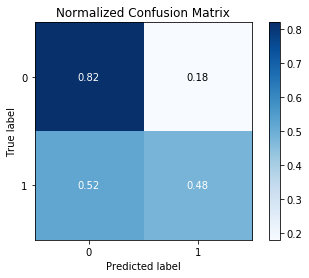

In [65]:
modelos = [('ExtTree', gs_et), ('RandFor', gs_rf)]
#hard voting
eclf_hard = VotingClassifier(estimators=modelos, voting='hard')

#predict test
eclf_hard.fit(X_train, y_train)
y_pred_ens = eclf_hard.predict(X_test)
print("#"*35)
print('Test set roc auc score for best params: %.3f ' % roc_auc_score(y_test, y_pred_ens))
skplt.metrics.plot_confusion_matrix(y_test, y_pred_ens, normalize=True)
plt.show()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39102 entries, 1690 to 20609007
Data columns (total 37 columns):
6m                               39102 non-null float64
5m                               39102 non-null float64
4m                               39102 non-null float64
3m                               39102 non-null float64
2m                               39102 non-null float64
1m                               39102 non-null float64
edad_r                           39102 non-null float64
6m_rel                           39102 non-null float64
5m_rel                           39102 non-null float64
4m_rel                           39102 non-null float64
3m_rel                           39102 non-null float64
2m_rel                           39102 non-null float64
1m_rel                           39102 non-null float64
Churn                            39102 non-null int64
GENDER_F                         39102 non-null int64
GENDER_M                         39102 non-null i

/home/seba/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


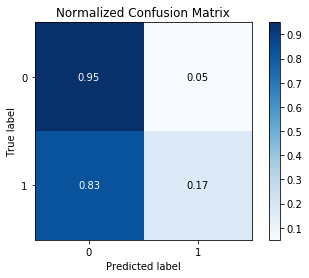

In [67]:
#evaluación contra el testeo externo
df_testo_ext = pd.read_csv("../../data/processed/4.4/test_cliente/m1.0 - mes actual dummies - churn estricto - 6m.N.polizaXmes y Info.Cliente.M.Pago.csv", index_col="Unnamed: 0")
df_testo_ext.info()

X_testo_ext = df_testo_ext.drop("Churn", axis=1)
y_testeo_ext = df_testo_ext["Churn"]

y_pred_testeo_ext = eclf_hard.predict(X_testo_ext)
print(roc_auc_score(y_testeo_ext, y_pred_testeo_ext))

skplt.metrics.plot_confusion_matrix(y_testeo_ext, y_pred_testeo_ext, normalize=True)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  1.3min finished


Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  1.5min finished
/home/seba/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


###################################
Test set roc auc score for best params: 0.675 


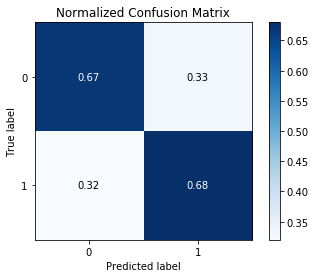

In [66]:
#soft voting
eclf_soft = VotingClassifier(estimators=modelos, voting='soft', weights=[2,1])

#predict test / overfitting
eclf_soft.fit(X_train, y_train)
y_pred_ens = eclf_soft.predict(X_test)
print("#"*35)
print('Test set roc auc score for best params: %.3f ' % roc_auc_score(y_test, y_pred_ens))
skplt.metrics.plot_confusion_matrix(y_test, y_pred_ens, normalize=True)
plt.show()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39102 entries, 1690 to 20609007
Data columns (total 37 columns):
6m                               39102 non-null float64
5m                               39102 non-null float64
4m                               39102 non-null float64
3m                               39102 non-null float64
2m                               39102 non-null float64
1m                               39102 non-null float64
edad_r                           39102 non-null float64
6m_rel                           39102 non-null float64
5m_rel                           39102 non-null float64
4m_rel                           39102 non-null float64
3m_rel                           39102 non-null float64
2m_rel                           39102 non-null float64
1m_rel                           39102 non-null float64
Churn                            39102 non-null int64
GENDER_F                         39102 non-null int64
GENDER_M                         39102 non-null i

/home/seba/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


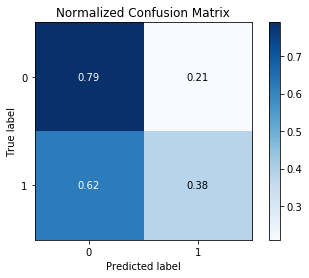

In [68]:
#evaluación contra el testeo externo
df_testo_ext = pd.read_csv("../../data/processed/4.4/test_cliente/m1.0 - mes actual dummies - churn estricto - 6m.N.polizaXmes y Info.Cliente.M.Pago.csv", index_col="Unnamed: 0")
df_testo_ext.info()

X_testo_ext = df_testo_ext.drop("Churn", axis=1)
y_testeo_ext = df_testo_ext["Churn"]

y_pred_testeo_ext = eclf_soft.predict(X_testo_ext)
print(roc_auc_score(y_testeo_ext, y_pred_testeo_ext))

skplt.metrics.plot_confusion_matrix(y_testeo_ext, y_pred_testeo_ext, normalize=True)